In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def centroid_histogram(clt):
  numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
  (hist, _) = np.histogram(clt.labels_, bins = numLabels)

  hist = hist.astype(np.float32)
  hist /= hist.sum()

  return hist

def plot_colors(hist, centroids):
  bar = np.zeros((50,300,3), dtype=np.uint8)
  startX = 0

  for(percent, color) in zip(hist, centroids):
    endX = startX + (percent * 300)
    cv2.rectangle(bar,(int(startX), 0), (int(endX), 50), color.astype(np.uint8).tolist(), -1)
    startX = endX
  return bar

def get_dominant_color(img, k_cluster):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.axis("off")
  plt.imshow(img_rgb)
  plt.show()
  img_reshape = img_rgb.reshape((img_rgb.shape[0] * img_rgb.shape[1], 3))
  clt = KMeans(n_clusters=k_cluster)
  clt.fit(img_reshape)
  hist = centroid_histogram(clt)
  bar = plot_colors(hist, clt.cluster_centers_)

  plt.axis("off")
  plt.imshow(bar)

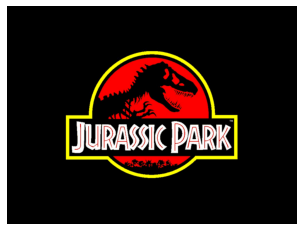

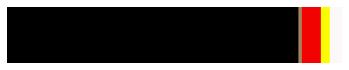

In [31]:
img = cv2.imread("/content/drive/MyDrive/colab_img/jp.png")

get_dominant_color(img, 5)